In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1)

In [2]:
# read data
df=pd.read_csv("train.csv")
DF=pd.read_csv("test.csv")

In [3]:
# check null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
DF.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# calculate the percentage of data is missing
print((df.Age.isnull().sum() / df.shape[0]) * 100)
print((df.Cabin.isnull().sum() / df.shape[0]) * 100)

19.865319865319865
77.10437710437711


### the missing data(Age) = 20%
##### so can't risk losing all of the data
### the missing data(Cabin) = 77%
##### so can't fill the lose all of the data by predict

In [9]:
# Data preprocessing
df.drop(['PassengerId','Name','Cabin','Ticket'], axis=1, inplace=True)
df.dropna(axis = 0,subset=['Embarked'],how='any',inplace=True)


ID = DF['PassengerId']
DF.drop(['PassengerId','Name','Cabin','Ticket'], axis=1, inplace=True)

df['Age'].fillna(df['Age'].median(), inplace=True)
DF['Age'].fillna(df['Age'].median(), inplace=True)
DF['Fare'].fillna(df['Fare'].median(), inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [11]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [12]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
DF.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
# One Hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
DF = pd.get_dummies(DF, columns=['Sex', 'Embarked'], drop_first=True)

In [15]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [16]:
DF.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Age         889 non-null    float64
 3   SibSp       889 non-null    int64  
 4   Parch       889 non-null    int64  
 5   Fare        889 non-null    float64
 6   Sex_male    889 non-null    uint8  
 7   Embarked_Q  889 non-null    uint8  
 8   Embarked_S  889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB


In [18]:
# Read train data(Slicing)
Y  = df.iloc[:,:1]
X  = df.iloc[:,1:]
m  = len(Y)

In [19]:
print(X)
print(Y)

     Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
0         3  22.0      1      0   7.2500         1           0           1
1         1  38.0      1      0  71.2833         0           0           0
2         3  26.0      0      0   7.9250         0           0           1
3         1  35.0      1      0  53.1000         0           0           1
4         3  35.0      0      0   8.0500         1           0           1
..      ...   ...    ...    ...      ...       ...         ...         ...
886       2  27.0      0      0  13.0000         1           0           1
887       1  19.0      0      0  30.0000         0           0           1
888       3  28.0      1      2  23.4500         0           0           1
889       1  26.0      0      0  30.0000         1           0           0
890       3  32.0      0      0   7.7500         1           1           0

[889 rows x 8 columns]
     Survived
0           0
1           1
2           1
3           1
4     

In [20]:
print(X.shape)
print(Y.shape)
print(m)

(889, 8)
(889, 1)
889


In [21]:
# Standardization
X  = (X - X.mean()) / (X.std())
DF = (DF - DF.mean()) / (DF.std())

# Normalization
# X   = (X-X.min()) / (X.max()-X.min())
# DF  = (DF-DF.min())  / (DF.max()-DF.min())

In [22]:
# Add the one's columns
X_train = np.hstack([np.ones(Y.shape) , X])
X_test  = np.hstack([np.ones((DF.shape[0],1)) , DF])

In [23]:
print(X_train.shape)
print(X_test.shape)

(889, 9)
(418, 9)


In [24]:
X_train

array([[ 1.        ,  0.82474438, -0.56335695, ...,  0.73492834,
        -0.30776764,  0.61644695],
       [ 1.        , -1.5713267 ,  0.66884046, ..., -1.35914631,
        -0.30776764, -1.62037485],
       [ 1.        ,  0.82474438, -0.2553076 , ..., -1.35914631,
        -0.30776764,  0.61644695],
       ...,
       [ 1.        ,  0.82474438, -0.10128292, ..., -1.35914631,
        -0.30776764,  0.61644695],
       [ 1.        , -1.5713267 , -0.2553076 , ...,  0.73492834,
        -0.30776764, -1.62037485],
       [ 1.        ,  0.82474438,  0.20676643, ...,  0.73492834,
         3.24554963, -1.62037485]])

In [25]:
X_test

array([[ 1.        ,  0.87243644,  0.37061789, ...,  0.75502418,
         2.8403538 , -1.3490589 ],
       [ 1.        ,  0.87243644,  1.35735852, ..., -1.32129232,
        -0.35122655,  0.73948414],
       [ 1.        , -0.31544119,  2.54144728, ...,  0.75502418,
         2.8403538 , -1.3490589 ],
       ...,
       [ 1.        ,  0.87243644,  0.68637489, ...,  0.75502418,
        -0.35122655,  0.73948414],
       [ 1.        ,  0.87243644, -0.14248724, ...,  0.75502418,
        -0.35122655,  0.73948414],
       [ 1.        ,  0.87243644, -0.14248724, ...,  0.75502418,
        -0.35122655, -1.3490589 ]])

In [26]:
def sigmoid(input):
    output = 1/(1+np.exp(-input)) 
    return output

In [27]:
def cost_function(theta, x, y):
    h = sigmoid(np.dot(x, theta.T))  
    J = (-1/m) * (np.sum(y*(np.log(h))+(1-y)*(np.log(1-h))))
    return J

In [28]:
def gradientDecsent(iterations, alpha , x, y):
#     theta = np.random.rand(1,x.shape[1])
    theta = np.full((1, x.shape[1]), 0)
    cost_history = []
    for i in range(iterations):
        theta = theta - (alpha / m) * np.transpose(sigmoid(np.dot(x, theta.T)) - y).dot(x)
        cost_history.append(cost_function(theta,x,y))
        if i%100 == 0 :
            print(cost_function(theta,x,y))
    return theta, cost_history

In [29]:
X_train = np.array(X_train)
Y = np.array(Y)
theta,cost_history = gradientDecsent(1000,0.1,X_train,Y)
print(theta)

0.6800400084371628
0.4545358824524221
0.44422691338128484
0.44229326568219357
0.44175314579102753
0.44157352671862626
0.4415090469669021
0.4414851281538078
0.4414761289821548
0.44147272174658875
[[-0.65513494 -0.91295472 -0.5089114  -0.35758624 -0.0724243   0.09958949
  -1.29815238 -0.01855972 -0.18397308]]


In [30]:
theta.shape

(1, 9)

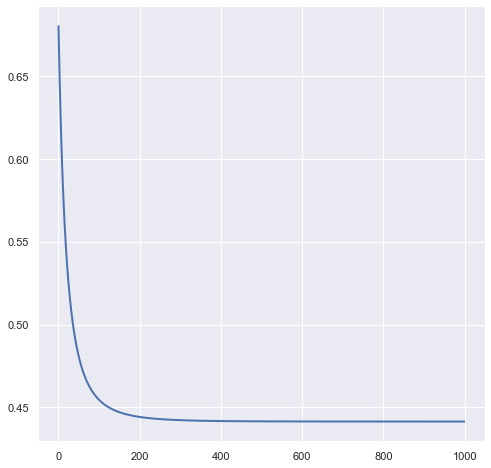

In [31]:
# print plot the cost function
plt.plot(np.arange(len(cost_history)), cost_history, lw=2)

In [32]:
# prediction
y_pre = sigmoid(np.dot(X_test, theta.T))
print(y_pre)
y_pre.shape

[[0.09388984]
 [0.31022657]
 [0.09245623]
 [0.09201673]
 [0.53516697]
 [0.14604017]
 [0.6476576 ]
 [0.16785761]
 [0.75939351]
 [0.05635347]
 [0.08860438]
 [0.29887271]
 [0.92188678]
 [0.04658168]
 [0.8125247 ]
 [0.83624953]
 [0.23243983]
 [0.15888541]
 [0.50151271]
 [0.51616351]
 [0.23700142]
 [0.1611458 ]
 [0.92929785]
 [0.62835893]
 [0.8752228 ]
 [0.02655609]
 [0.9601304 ]
 [0.15099681]
 [0.3443921 ]
 [0.06183307]
 [0.07609714]
 [0.13692805]
 [0.41095467]
 [0.46156889]
 [0.45814687]
 [0.17277245]
 [0.59021504]
 [0.65636978]
 [0.09908651]
 [0.09585663]
 [0.07926219]
 [0.46790035]
 [0.05451988]
 [0.79863959]
 [0.82222175]
 [0.09883608]
 [0.39611835]
 [0.11856866]
 [0.85248101]
 [0.47748474]
 [0.42384955]
 [0.308065  ]
 [0.716278  ]
 [0.83815669]
 [0.29977262]
 [0.05148368]
 [0.06836963]
 [0.09879241]
 [0.06209867]
 [0.9547896 ]
 [0.13137087]
 [0.19828998]
 [0.12682532]
 [0.71713903]
 [0.58265267]
 [0.81342566]
 [0.74862296]
 [0.29658755]
 [0.5346158 ]
 [0.73281573]
 [0.70056979]
 [0.11

(418, 1)

In [33]:
y_pred_final = []
for i in y_pre:
    if i >= 0.5:
        y_pred_final.append(1)
    else:
        y_pred_final.append(0)
print(y_pred_final)

[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 

In [34]:
submission = {'PassengerId':ID,'Survived':y_pred_final}
submission = pd.DataFrame(submission)
submission.to_csv("Submission.csv", index=False)

In [35]:
r = pd.read_csv('submission.csv')
r['PassengerId']=r['PassengerId'].astype(int)
r.to_csv("submission.csv",header =['PassengerId','Survived'],index=False)
r = pd.read_csv('submission.csv')
r

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
